In [1]:
import networkx as nx
from operator import add, sub
import numpy as np
import matplotlib.pyplot as plt
from python.SpringRank import SpringRank
import python.tools as tl
import copy
import random
from def_space_spring import *

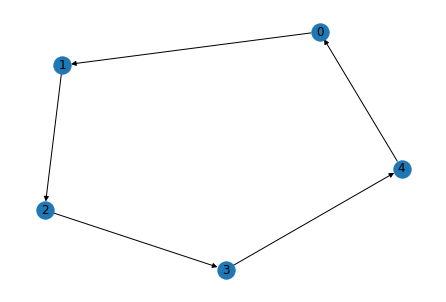

In [3]:
DG = nx.DiGraph()
DG.add_weighted_edges_from([(0, 1, 1), (1, 2, 1), (2, 3, 2), (3, 4, 1), (4, 0, 1)])
nx.draw(DG, with_labels=True)


In [4]:
graph_space_ranks = get_space_ranks(DG, with_rounding = True, min_iter=1, print_rate=1, max_iter=10)

Currently finished iteration  1
Change in this iteration 1.6666666666666667
Currently finished iteration  2
Change in this iteration 0.9583333333333339
Currently finished iteration  3
Change in this iteration 0.039930555555555025
Currently finished iteration  4
Change in this iteration 0.001663773148148362
Currently finished iteration  5
Change in this iteration 6.932388117297794e-05
Currently finished iteration  6
Change in this iteration 2.888495048813944e-06
Currently finished iteration  7
Change in this iteration 1.2035396024234757e-07
Currently finished iteration  8
Change in this iteration 5.014748172271766e-09
Currently finished iteration  9
Change in this iteration 2.0894808105964557e-10
Currently finished iteration  10
Change in this iteration 8.70647998141294e-12
Currently finished iteration  11
Change in this iteration 3.6282088444750116e-13


In [12]:
def get_page_space_ranks(graph, self_loop_weight = 1, with_rounding = False,
                        min_iter = 1000, print_rate = 100, max_iter = 10000,
                        cut_off_change = 1):

    fspace = {}
    for node in graph.nodes():
        fspace[node] = 1

    norm_const = {}
    for node in graph.nodes():
        node_in_weight = graph.in_degree(node, weight = "weight")
        norm_const[node] = 1/(node_in_weight + self_loop_weight)


    #calculating what each nodes page will look like
    i = 0
    while True:
        i = i+1
        change = 0
        for node in graph.nodes():
            sum_normed_succ_fspace = 0
            for successor in graph.successors(node):
                sum_normed_succ_fspace = sum_normed_succ_fspace + norm_const[successor]*fspace[successor]*graph.get_edge_data(node, successor)["weight"]

            new_fspace_node = 1 + sum_normed_succ_fspace
            change = change + fspace[node] - new_fspace_node
            fspace[node] = new_fspace_node

        if i%print_rate == 0:
            print("Currently finished iteration ", i)
            print("Change in this iteration", change)

        if (i>max_iter) or (i>min_iter and abs(change) < cut_off_change):
            print("stopped at iteration:", i)
            break

    return fspace

{0: 1.3333333333333333,
 2: 0.3333333333333333,
 1: 2.3333333333333335,
 3: 0.5,
 4: 0.5}